## Import Library

In [22]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [13]:
data = load_breast_cancer()

# Membuat DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Menampilkan 5 baris pertama
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Deskripsi Data

In [14]:
# Melihat dimensi dataset
print("Dimensi dataset:", df.shape)

# Melihat 5 baris pertama dataset
print("\nLima baris pertama dataset:\n", df.head())

# Melihat informasi dataset
print("\nInformasi dataset:\n", df.info())

# Melihat deskripsi statistik dataset
print("\nDeskripsi statistik dataset:\n", df.describe())

# Melihat distribusi kelas target
print("\nDistribusi kelas target:\n", df['target'].value_counts())

# Melihat korelasi antar variabel
print("\nKorelasi antar variabel:\n", df.corr())


Dimensi dataset: (569, 31)

Lima baris pertama dataset:
    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  wor

## Eksplorasi Data

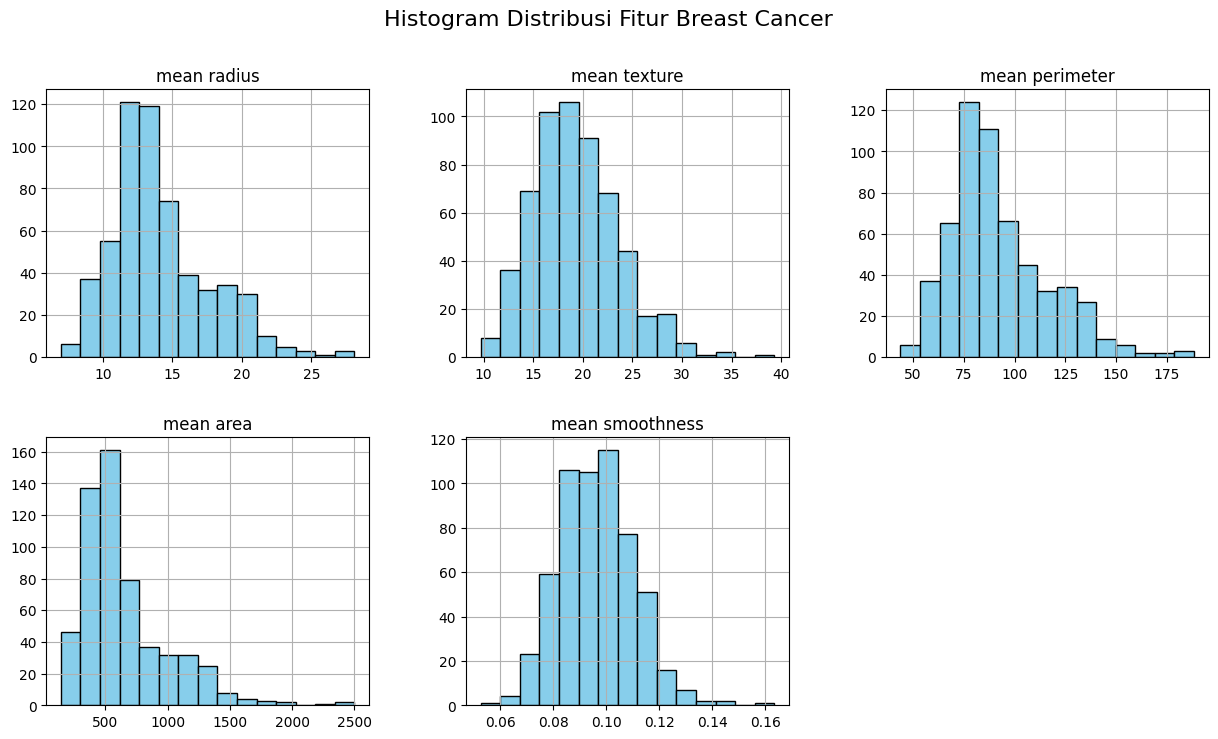

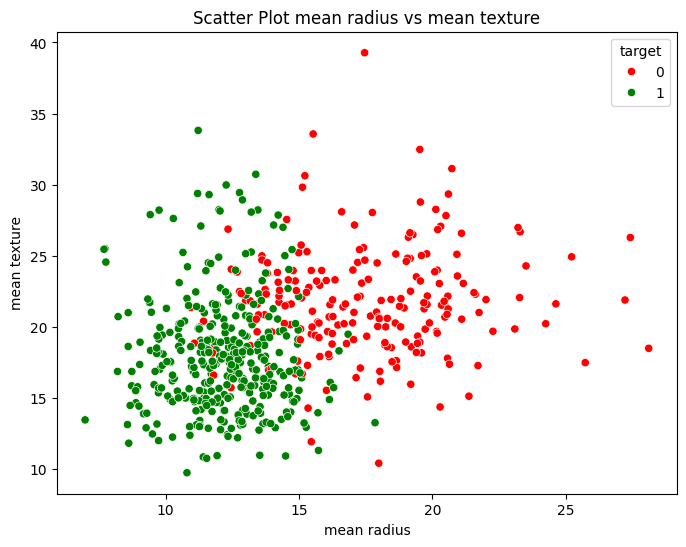

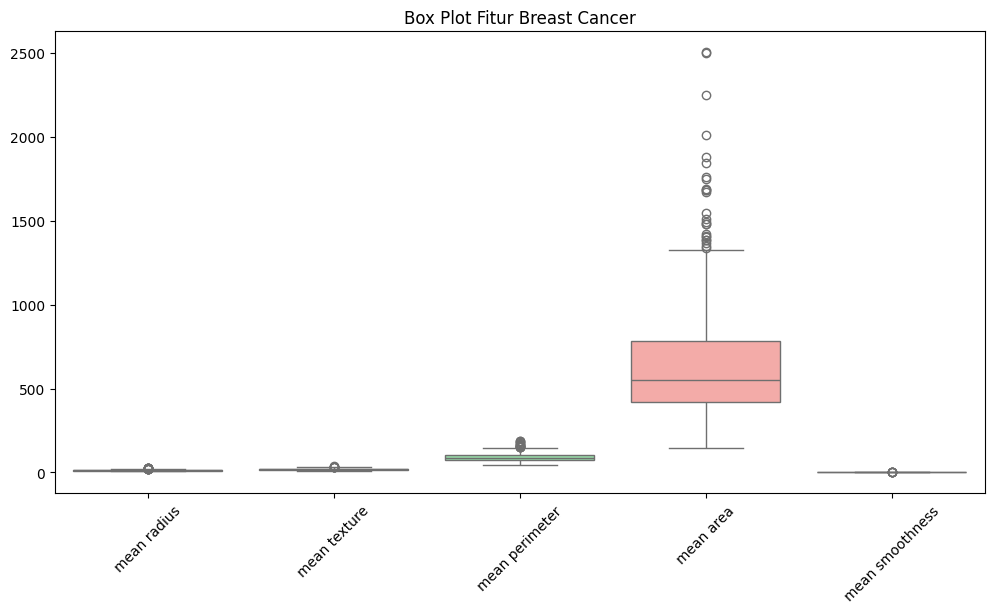

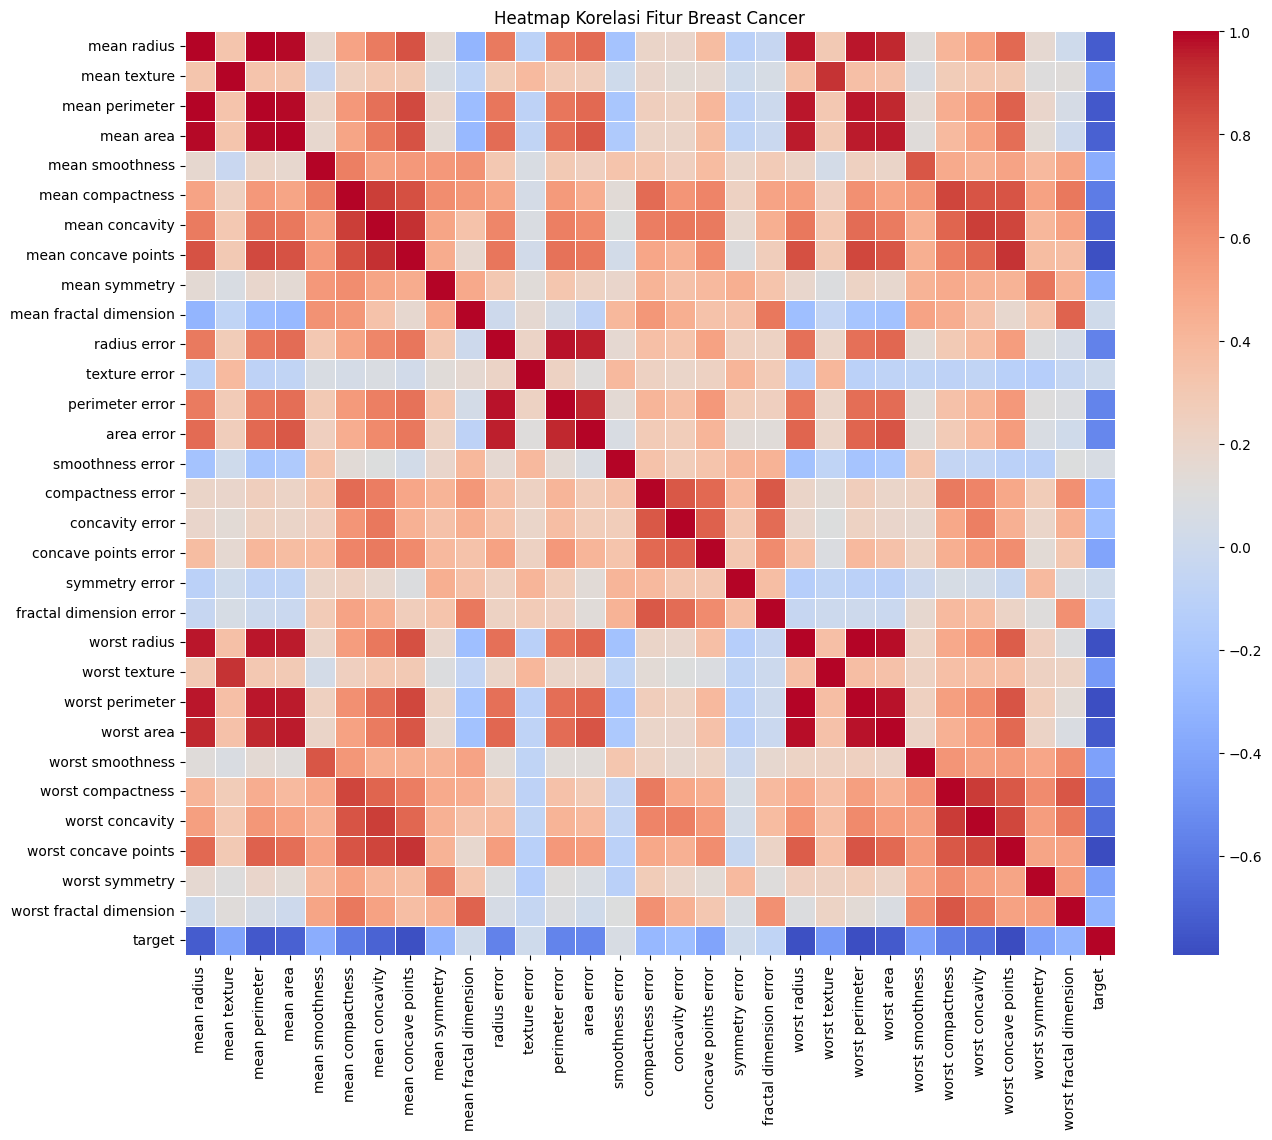

In [16]:
# Pilih beberapa fitur untuk visualisasi agar tidak terlalu banyak
features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']

# Plot histogram
df[features].hist(bins=15, figsize=(15,8), layout=(2,3), color='skyblue', edgecolor='black')
plt.suptitle('Histogram Distribusi Fitur Breast Cancer', fontsize=16)
plt.show()

# Scatter plot 2 fitur vs target
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='mean radius', y='mean texture', hue='target', palette=['red','green'])
plt.title('Scatter Plot mean radius vs mean texture')
plt.show()

# Box plot
plt.figure(figsize=(12,6))
sns.boxplot(data=df[features], palette='pastel')
plt.title('Box Plot Fitur Breast Cancer')
plt.xticks(rotation=45)
plt.show()

# Heatmap korelasi
plt.figure(figsize=(15,12))
correlation = df.corr()
sns.heatmap(correlation, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Fitur Breast Cancer')
plt.show()


## Verifikasi Kualitas Data

In [21]:
# Cek jumlah missing values per kolom
missing_values = df.isnull().sum()
print("Missing values per kolom:\n", missing_values)

# Total missing values
total_missing = df.isnull().sum().sum()
print("\nTotal missing values di dataset:", total_missing)

# Cek jumlah baris duplikat
duplicate_rows = df.duplicated().sum()
print("Jumlah baris duplikat:", duplicate_rows)

# Jika ada, bisa ditampilkan
if duplicate_rows > 0:
    print(df[df.duplicated()])

# Statistik dasar
stats = df.describe()
print(stats)

# Outlier identifikasi sederhana: nilai < Q1 - 1.5*IQR atau > Q3 + 1.5*IQR
outliers = {}
# Loop untuk semua kolom kecuali target
for col in df.columns[:-1]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Hitung jumlah outlier
    outlier_count = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)][col].count()
    outliers[col] = outlier_count

# Buat DataFrame untuk menampilkan hasil secara rapi
df_outliers = pd.DataFrame(list(outliers.items()), columns=['Fitur', 'Jumlah Outlier'])
df_outliers = df_outliers.sort_values(by='Jumlah Outlier', ascending=False).reset_index(drop=True)

# Tampilkan hasil
print(df_outliers)

# Cek nilai target
print("\nNilai unik target:", df['target'].unique())

# Cek tipe data semua kolom
print("\nTipe data tiap kolom:\n", df.dtypes)

Missing values per kolom:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

Total missing values di dataset: 0
Jumlah baris duplikat: 0


Dari hasil diatas ditemukan bahwa dataset tidak memiliki missing values namun memiliki data outlier. Namun dalam konteks medis, outlier tidak selalu salah, tapi bisa menjadi informasi penting. Sehingga, untuk saat ini outlier akan tetap dibiarkan ada pada dataset.

## Teknik Pemilihan Data

Teknik yang digunakan yaitu Stratified Sampling. Karena data memiliki class label (benign vs malignant), sehingga membutuhkan pembagian sampel yang tetap proporsional ke tiap kelas.

Stratified sampling memastikan bahwa representasi tiap kelas tetap terjaga sehingga analisis/statistical inference lebih valid dan model machine learning  tidak bias ke kelas tertentu.

In [24]:
# Pisahkan fitur dan target
X = df.drop(columns=["target"])
y = df["target"]

# Stratified split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Ukuran data training:", X_train.shape)
print("Ukuran data testing:", X_test.shape)

# Cek distribusi kelas di train dan test
print("Distribusi kelas di TRAIN:")
print(y_train.value_counts(normalize=True))

print("\nDistribusi kelas di TEST:")
print(y_test.value_counts(normalize=True))

Ukuran data training: (455, 30)
Ukuran data testing: (114, 30)
Distribusi kelas di TRAIN:
target
1    0.626374
0    0.373626
Name: proportion, dtype: float64

Distribusi kelas di TEST:
target
1    0.631579
0    0.368421
Name: proportion, dtype: float64


## Identifikasi Kolom dan Baris

In [25]:
# Records (rows) dari data training
records_train = X_train.shape[0]
print("\nRecords (rows) data training:", records_train)

# Records (rows) dari data testing
records_test = X_test.shape[0]
print("\nRecords (rows) data testing:", records_test)

# Attributes (columns)
attributes = X.shape[1]
print("\nAttributes (columns):", attributes)


Records (rows) data training: 455

Records (rows) data testing: 114

Attributes (columns): 30


## Integrasi Dataset

In [26]:
# Gabungkan kembali data train dan test (contoh integrasi dataset)
train_df = X_train.copy()
train_df['target'] = y_train
test_df = X_test.copy()
test_df['target'] = y_test
merged_df = pd.concat([train_df, test_df], axis=0)

# ====== Pemeriksaan kualitas integrasi ======
print("Ukuran dataset setelah penggabungan:", merged_df.shape)

# Cek duplikat
print("\nJumlah baris duplikat setelah penggabungan:", merged_df.duplicated().sum())

# Cek tipe data
print("\nTipe data setiap kolom:\n", merged_df.dtypes)

# Cek missing value
print("\nJumlah nilai kosong pada setiap kolom:\n", merged_df.isnull().sum())

# Cek distribusi target
print("\nDistribusi kelas target:\n", merged_df['target'].value_counts(normalize=True))

# ====== Formatting data ======
# Ubah nama kolom agar tidak ada spasi → lebih enak dipakai di pemodelan ML
merged_df.columns = [col.replace(' ', '_') for col in merged_df.columns]

# Contoh standarisasi nilai numerik (opsional, kalau buat pemodelan ML)
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# feature_cols = merged_df.drop('target', axis=1).columns
# merged_df[feature_cols] = scaler.fit_transform(merged_df[feature_cols])

print("\nDataset yang sudah digabungkan dan diformat:\n", merged_df.head())

Ukuran dataset setelah penggabungan: (569, 31)

Jumlah baris duplikat setelah penggabungan: 0

Tipe data setiap kolom:
 mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst